In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError
from bs4 import BeautifulSoup

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
url = 'https://www.goodreads.com/list/show/1.Best_Books_Ever'

response = urlopen(url)
html = response.read().decode('utf-8')

soup = BeautifulSoup(html, 'html.parser')
#print(soup.find('h1', class = "hello-world").get_text())
print(soup.find('h1'))

<h1 class="gr-h1 gr-h1--serif">Best Books Ever
  </h1>


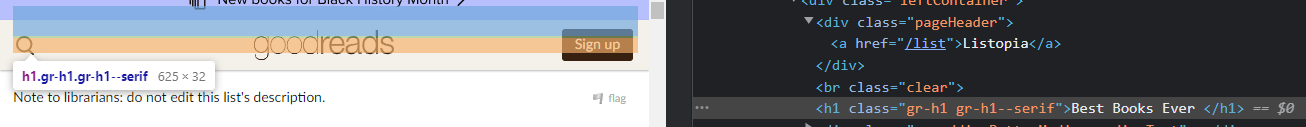

In [3]:
html[:1000]

'<!DOCTYPE html>\n<html class="desktop withSiteHeaderTopFullImage\n">\n<head>\n  <title>Best Books Ever (102624 books)</title>\n\n<meta content=\'101,131 books based on 234367 votes: The Hunger Games by Suzanne Collins, Harry Potter and the Order of the Phoenix by J.K. Rowling, Pride and Prejudice ...\' name=\'description\'>\n<meta content=\'telephone=no\' name=\'format-detection\'>\n<link href=\'https://www.goodreads.com/list/show/1.Best_Books_Ever\' rel=\'canonical\'>\n\n\n\n    <script type="text/javascript"> var ue_t0=window.ue_t0||+new Date();\n </script>\n  <script type="text/javascript">\n    var ue_mid = "A1PQBFHBHS6YH1";\n    var ue_sn = "www.goodreads.com";\n    var ue_furl = "fls-na.amazon.com";\n    var ue_sid = "306-9136452-5797110";\n    var ue_id = "A9MSBRHJHZS7PJGNTDPE";\n\n    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:

In [5]:
type(html)

str

In [6]:
def trata_html(input):
    return " ".join(input.split()).replace('> <', '><')

In [7]:
html = trata_html(html)
html[:1000]

'<!DOCTYPE html><html class="desktop withSiteHeaderTopFullImage "><head><title>Best Books Ever (102624 books)</title><meta content=\'101,131 books based on 234367 votes: The Hunger Games by Suzanne Collins, Harry Potter and the Order of the Phoenix by J.K. Rowling, Pride and Prejudice ...\' name=\'description\'><meta content=\'telephone=no\' name=\'format-detection\'><link href=\'https://www.goodreads.com/list/show/1.Best_Books_Ever\' rel=\'canonical\'><script type="text/javascript"> var ue_t0=window.ue_t0||+new Date(); </script><script type="text/javascript"> var ue_mid = "A1PQBFHBHS6YH1"; var ue_sn = "www.goodreads.com"; var ue_furl = "fls-na.amazon.com"; var ue_sid = "306-9136452-5797110"; var ue_id = "A9MSBRHJHZS7PJGNTDPE"; (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}function b(m,l,h,j,i){var k={m:m,f:l,l:h,c:""+

In [8]:
card = {}

In [9]:
# Selecionando os dados no HTML (primeiro livro)

soup.find('tr', {'itemtype' : 'http://schema.org/Book'})

<tr itemscope="" itemtype="http://schema.org/Book">
<td class="number" valign="top">1</td>
<td valign="top" width="5%">
<div class="u-anchorTarget" id="2767052"></div>
<div class="js-tooltipTrigger tooltipTrigger" data-resource-id="2767052" data-resource-type="Book">
<a href="/book/show/2767052-the-hunger-games" title="The Hunger Games">
<img alt="The Hunger Games (The Hunge..." class="bookCover" itemprop="image" src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1586722975i/2767052._SX50_.jpg"/>
</a> </div>
</td>
<td valign="top" width="100%">
<a class="bookTitle" href="/book/show/2767052-the-hunger-games" itemprop="url">
<span aria-level="4" itemprop="name" role="heading">The Hunger Games (The Hunger Games, #1)</span>
</a> <br/>
<span class="by">by</span>
<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<div class="authorName__container">
<a class="authorName" href="https://www.goodreads.com/author/show/153394.Suzanne_Collins" itemprop

In [10]:
livro = soup.find('tr', {'itemtype' : 'http://schema.org/Book'})

In [11]:
# Título:

livro.find('a', {'class' : 'bookTitle'})

<a class="bookTitle" href="/book/show/2767052-the-hunger-games" itemprop="url">
<span aria-level="4" itemprop="name" role="heading">The Hunger Games (The Hunger Games, #1)</span>
</a>

In [12]:
livro.find('span', {'itemprop' : 'name'}).get_text()

'The Hunger Games (The Hunger Games, #1)'

In [13]:
card['book_title'] = livro.find('span', {'itemprop' : 'name'}).get_text()
card

{'book_title': 'The Hunger Games (The Hunger Games, #1)'}

In [14]:
# Autor(a):

livro.find('span', {'itemprop' : 'author'})

<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<div class="authorName__container">
<a class="authorName" href="https://www.goodreads.com/author/show/153394.Suzanne_Collins" itemprop="url"><span itemprop="name">Suzanne Collins</span></a>
</div>
</span>

In [15]:
livro.find('a', {'class' : 'authorName'}).get_text()

'Suzanne Collins'

In [16]:
card['author'] = livro.find('a', {'class' : 'authorName'}).get_text()
card

{'book_title': 'The Hunger Games (The Hunger Games, #1)',
 'author': 'Suzanne Collins'}

In [17]:
# Média de notas e classificação:

livro.find('span', {'class' : 'minirating'}).get_text()

' 4.33 avg rating — 7,836,017 ratings'

In [18]:
livro.find('span', {'class' : 'minirating'}).get_text().split(' ')

['', '4.33', 'avg', 'rating', '—', '7,836,017', 'ratings']

In [19]:
livro.find('span', {'class' : 'minirating'}).get_text().split(' ')[1]

'4.33'

In [20]:
card['avg_rating'] = livro.find('span', {'class' : 'minirating'}).get_text().split(' ')[1]
card

{'book_title': 'The Hunger Games (The Hunger Games, #1)',
 'author': 'Suzanne Collins',
 'avg_rating': '4.33'}

In [21]:
# Pontuação

livro.find('a', {'href' : '#'}).get_text()

'score: 3,426,821'

In [22]:
livro.find('a', {'href' : '#'}).get_text()[7:]

'3,426,821'

In [23]:
card['score'] = livro.find('a', {'href' : '#'}).get_text()[7:]
card

{'book_title': 'The Hunger Games (The Hunger Games, #1)',
 'author': 'Suzanne Collins',
 'avg_rating': '4.33',
 'score': '3,426,821'}

In [24]:
#  Número de pessoas que votaram

livro.find('span', {'class' : 'smallText uitext'})

<span class="smallText uitext">
<a href="#" onclick="Lightbox.showBoxByID('score_explanation', 300); return false;">score: 3,426,821</a>,
              <span class="greyText">and</span>
<a href="#" id="loading_link_931509" onclick="new Ajax.Request('/list/list_book/4348768', {asynchronous:true, evalScripts:true, onFailure:function(request){Element.hide('loading_anim_931509');$('loading_link_931509').innerHTML = '&lt;span class=&quot;error&quot;&gt;ERROR&lt;/span&gt;try again';$('loading_link_931509').show();;Element.hide('loading_anim_931509');}, onLoading:function(request){;Element.show('loading_anim_931509');Element.hide('loading_link_931509')}, onSuccess:function(request){Element.hide('loading_anim_931509');Element.show('loading_link_931509');}, parameters:'authenticity_token=' + encodeURIComponent('THAb126xEtflMHIfJDjZbafgu9gJA0hUlB1Ydl23N+qsvU1k7ozPbaf4WqK2UiIi30cMdvCI3Bo458hs2M0bEg==')}); return false;">34,889 people voted</a><img alt="Loading trans" class="loading" id="loading_a

In [25]:
livro.find('a', {'href' : '#'}).findNext()

<span class="greyText">and</span>

In [26]:
livro.find('a', {'href' : '#'}).findNext().findNext().get_text()

'34,889 people voted'

In [27]:
livro.find('a', {'href' : '#'}).findNext().findNext().get_text().split(' ')

['34,889', 'people', 'voted']

In [28]:
livro.find('a', {'href' : '#'}).findNext().findNext().get_text().split(' ')[0]

'34,889'

In [29]:
card['people_voted'] = livro.find('a', {'href' : '#'}).findNext().findNext().get_text().split(' ')[0]
card

{'book_title': 'The Hunger Games (The Hunger Games, #1)',
 'author': 'Suzanne Collins',
 'avg_rating': '4.33',
 'score': '3,426,821',
 'people_voted': '34,889'}

In [30]:
# criando um dataset

df = pd.DataFrame.from_dict(card, orient = 'index')
df

,0
book_title,"The Hunger Games (The Hunger Games, #1)"
author,Suzanne Collins
avg_rating,4.33
score,"3,426,821"
people_voted,"34,889"


In [31]:
df = pd.DataFrame.from_dict(card, orient = 'index').T
df

,book_title,author,avg_rating,score,people_voted
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.33,"3,426,821","34,889"


# Web scraping da primeira página:

In [32]:
# Quantidade de livros na primeira página

len(soup.find('table', {'class' : 'tableList js-dataTooltip'}).findAll('tr', {'itemtype' : 'http://schema.org/Book'}))

100

In [33]:
indicados = soup.find('table', {'class' : 'tableList js-dataTooltip'}).findAll('tr', {'itemtype' : 'http://schema.org/Book'})

#for indicado in indicados:
#    print(str(indicado) + '\n\n==outro livro==\n\n')

In [34]:
cards = []

indicados = soup.find('table', {'class' : 'tableList js-dataTooltip'}).findAll('tr', {'itemtype' : 'http://schema.org/Book'})

for livro_rank in indicados:
    card = {}
    
    # titulo
    card['book_title'] = livro_rank.find('span', {'itemprop' : 'name'}).get_text()
    
    # autor(a)
    card['author'] = livro_rank.find('a', {'class' : 'authorName'}).get_text()
    
    # média das notas
    card['avg_rating'] = livro_rank.find('span', {'class' : 'minirating'}).get_text().split(' ')[1]
    
    # pontuação
    card['score'] = livro_rank.find('a', {'href' : '#'}).get_text()[7:]
    
    # quantidade de pessoas que votaram
    card['people_voted'] = livro_rank.find('a', {'href' : '#'}).findNext().findNext().get_text().split(' ')[0]
    
    cards.append(card)
    
dataset = pd.DataFrame(cards)
dataset

,book_title,author,avg_rating,score,people_voted
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.33,"3,426,821","34,889"
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,"2,931,777","29,959"
2,Pride and Prejudice,Jane Austen,4.28,"2,440,681","25,073"
3,To Kill a Mockingbird,Harper Lee,4.27,"2,291,220","23,402"
4,The Book Thief,Markus Zusak,4.39,"1,652,341","17,009"
...,...,...,...,...,...
95,The Complete Stories and Poems,Edgar Allan Poe,4.38,"277,735","3,153"
96,To Kill a Mockingbird,Harper Lee,4.27,"277,203","2,983"
97,Interview with the Vampire (The Vampire Chroni...,Anne Rice,4.01,"276,989","3,099"
98,Don Quixote,Miguel de Cervantes Saavedra,3.89,"276,255","3,142"


In [35]:
# identificando quantas páginas a lista tem

soup.find('div', {'class' : 'pagination'})

<div class="pagination"><span class="previous_page disabled">← Previous</span> <em class="current">1</em> <a href="/list/show/1.Best_Books_Ever?page=2" rel="next">2</a> <a href="/list/show/1.Best_Books_Ever?page=3">3</a> <a href="/list/show/1.Best_Books_Ever?page=4">4</a> <a href="/list/show/1.Best_Books_Ever?page=5">5</a> <a href="/list/show/1.Best_Books_Ever?page=6">6</a> <a href="/list/show/1.Best_Books_Ever?page=7">7</a> <a href="/list/show/1.Best_Books_Ever?page=8">8</a> <a href="/list/show/1.Best_Books_Ever?page=9">9</a> <span class="gap">…</span> <a href="/list/show/1.Best_Books_Ever?page=99">99</a> <a href="/list/show/1.Best_Books_Ever?page=100">100</a> <a class="next_page" href="/list/show/1.Best_Books_Ever?page=2" rel="next">Next →</a></div>

In [36]:
soup.find('div', {'class' : 'pagination'}).get_text()

'← Previous 1 2 3 4 5 6 7 8 9 … 99 100 Next →'

In [37]:
soup.find('div', {'class' : 'pagination'}).get_text().split()

['←',
 'Previous',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '…',
 '99',
 '100',
 'Next',
 '→']

In [38]:
soup.find('div', {'class' : 'pagination'}).get_text().split()[-3]

'100'

In [39]:
int(soup.find('div', {'class' : 'pagination'}).get_text().split()[-3])

100

In [40]:
paginas = int(soup.find('div', {'class' : 'pagination'}).get_text().split()[-3])

cards = []

for pagina in range(paginas):
    endereco = urlopen('https://www.goodreads.com/list/show/1.Best_Books_Ever?page=' + str(pagina + 1))
    html = endereco.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    
    indicados = soup.find('table', {'class' : 'tableList js-dataTooltip'}).findAll('tr', {'itemtype' : 'http://schema.org/Book'})

    for livro_rank in indicados:
        card = {}

        # titulo
        card['book_title'] = livro_rank.find('span', {'itemprop' : 'name'}).get_text()

        # autor(a)
        card['author'] = livro_rank.find('a', {'class' : 'authorName'}).get_text()

        # média das notas
        card['avg_rating'] = livro_rank.find('span', {'class' : 'minirating'}).get_text().split(' ')[1]

        # pontuação
        card['score'] = livro_rank.find('a', {'href' : '#'}).get_text()[7:]

        # quantidade de pessoas que votaram
        card['people_voted'] = livro_rank.find('a', {'href' : '#'}).findNext().findNext().get_text().split(' ')[0]

        cards.append(card)
    
dataset = pd.DataFrame(cards)
dataset

,book_title,author,avg_rating,score,people_voted
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.33,"3,426,919","34,890"
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,"2,931,877","29,960"
2,Pride and Prejudice,Jane Austen,4.28,"2,440,877","25,075"
3,To Kill a Mockingbird,Harper Lee,4.27,"2,291,516","23,405"
4,The Book Thief,Markus Zusak,4.39,"1,652,440","17,010"
...,...,...,...,...,...
9995,رانيا,هاني حجاج,4.58,296,3
9996,Diary of an Oxygen Thief,Anonymous,2.81,296,3
9997,The Prison of Deviants,Tamuna Tsertsvadze,4.55,296,3
9998,The Magic Fish,Trung Le Nguyen,4.55,296,3
